In [2]:
# -*- coding:utf-8 -*-
from gensim import models
import numpy as np
import nltk
from sklearn.decomposition import PCA
import jieba
import gensim
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import jieba.analyse
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import word2vec, KeyedVectors,Word2Vec
import jieba.posseg as pseg #加载各库
import pkuseg
import csv
import itertools
import matplotlib.pyplot as plt
# -*- coding:utf-8 -*-
#jieba.load_userdict("userdict.txt")  #加载自定义词典

In [3]:
from nltk.tokenize import MWETokenizer
stopwords = [line.strip() for line in open('stop_words.txt', encoding='UTF-8').readlines()] #加载自定义停止词

In [49]:
sentence=str()

with open('WF-CNKI.txt', encoding='utf-8') as f: #加载原始数据库并分词
    document = f.read()
    #document_cut = jieba.cut(document)
    tokenizer = MWETokenizer([('solar', 'cell')], separator = '_')
    seg = pkuseg.pkuseg(user_dict = "userdict.txt")
    #text=tokenizer.tokenize(nltk.word_tokenize(document))
    text=seg.cut(document)
    result = ' '.join(text)
    for word in result:
        if word not in stopwords:
            if word != "\t":
                sentence += word

    with open('0828.txt', 'w',encoding="utf-8") as f2:
        f2.write(sentence)

In [5]:
#加载语料
sentences = word2vec.LineSentence('0828.txt') #正式训练前的格式化

In [50]:
import collections
from collections import Counter
wordcount = Counter(sentence)
wordcount.most_common(10)

[(' ', 4659685),
 ('料', 151559),
 ('材', 146276),
 ('合', 89764),
 ('性', 87189),
 ('用', 75285),
 ('和', 69920),
 ('对', 64872),
 ('能', 63836),
 ('复', 59153)]

In [51]:
len(wordcount)

3938

In [22]:
wordcount = {}
for word in sentence:
    wordcount[word] = wordcount.get(word, 0)+1
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)[:10]

[(' ', 4659685),
 ('料', 151559),
 ('材', 146276),
 ('合', 89764),
 ('性', 87189),
 ('用', 75285),
 ('和', 69920),
 ('对', 64872),
 ('能', 63836),
 ('复', 59153)]

In [65]:
sentence1 = sentence.split(' ') 

In [43]:
sentence1.sort()
import collections
from collections import Counter
wordcount = Counter(sentence1)
wordcount.most_common(50)

[('', 776200),
 ('材料', 106487),
 ('和', 68659),
 ('对', 49146),
 ('在', 45031),
 ('为', 35874),
 ('性能', 33565),
 ('研究', 32568),
 ('(', 32057),
 ('复合材料', 31038),
 (')', 30949),
 ('中', 30493),
 ('进行', 30271),
 ('与', 26322),
 ('分析', 23044),
 ('结果', 21849),
 ('结构', 20576),
 ('复合', 20414),
 ('表明', 18946),
 ('等', 18647),
 ('方法', 18300),
 ('并', 18094),
 ('影响', 18079),
 ('应用', 17694),
 ('采用', 17668),
 ('及', 17585),
 ('是', 16678),
 ('其', 16635),
 ('建筑', 16011),
 ('通过', 15832),
 ('制备', 15492),
 ('发展', 14651),
 ('以', 13874),
 ('纤维', 13525),
 ('种', 12957),
 ('/', 12742),
 ('技术', 12496),
 ('工程', 12425),
 ('不同', 12146),
 ('具有', 11782),
 ('质量', 11570),
 ('下', 11281),
 ('强度', 11129),
 (':', 11002),
 ('-', 10974),
 ('提高', 10646),
 ('设计', 10296),
 ('一', 9582),
 ('以及', 9294),
 ('试验', 9222)]

In [47]:
len(wordcount)

125335

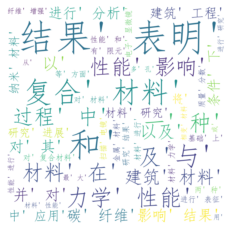

In [68]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                      background_color='white',
                      max_words=50,
                      #stopwords = stopwords,
                      font_path='simfang.ttf',# 设置字体格式，如不设置显示不了中文
                      min_font_size = 10).generate(str(sentence1))

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.savefig('张磊词云1.jpg',dpi=300, bbox_inches='tight')
plt.show()

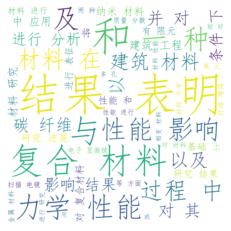

In [67]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 800, height = 800,
                      background_color='white',
                      max_words=50,
                      #stopwords = stopwords,
                      font_path='simfang.ttf',# 设置字体格式，如不设置显示不了中文
                      min_font_size = 10).generate(str(sentence))

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.savefig('张磊词云.jpg',dpi=300, bbox_inches='tight')
plt.show()